In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
!mkdir dataset

In [4]:
!ls

dataset  drive	sample_data


In [5]:
!cp drive/MyDrive/datasets/simpsond.zip /content/dataset/

In [6]:
cd dataset/

/content/dataset


In [7]:
!unzip simpsond.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0386.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0387.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0388.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0389.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0390.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0391.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0392.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0393.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0394.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0395.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0396.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flanders/pic_0397.jpg  
  inflating: simpsond/train/simpsons_dataset/ned_flander

In [8]:
cd ..

/content


In [9]:
train_data_dir = "/content/dataset/simpsond/train/simpsons_dataset"
batch_size = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [10]:
# train_datagen = ImageDataGenerator(
#     preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
#     validation_split=0.2) # set validation split

In [11]:
# try another augment
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2) # set validation split

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    batch_size=batch_size,
    shuffle = True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,# same directory as training data
    batch_size=batch_size,
    shuffle = True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset='validation') # set as validation data

Found 18093 images belonging to 42 classes.
Found 4503 images belonging to 42 classes.


In [13]:
total_train = 18093
total_val = 4503

In [14]:
sample_training_images, _ = next(train_generator)

In [15]:
# Эта функция построит график изображения в табличном виде с одной строкой и 5 колонками, где изображения разместятся в каждой колонке.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


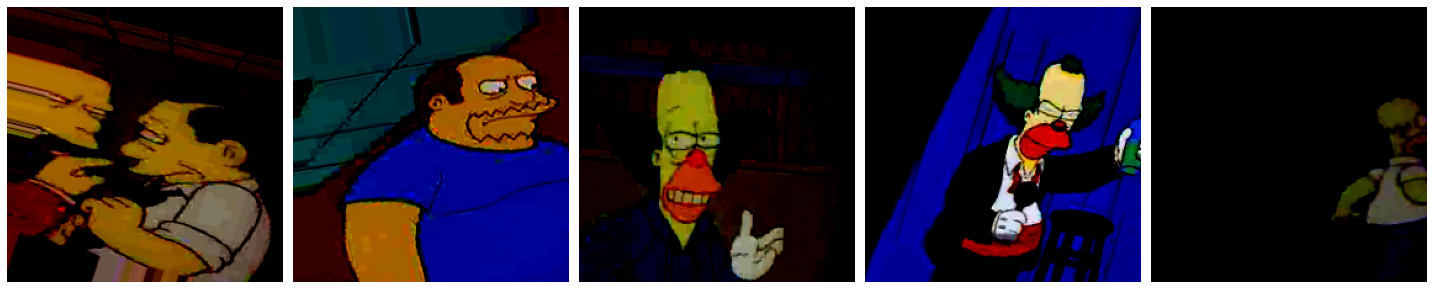

In [16]:
plotImages(sample_training_images[:5])

In [17]:
sample_training_images.shape

(32, 224, 224, 3)

In [48]:
#предобученная , установка весов необуч
# mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
# mobile_net.trainable=False

# efficient_net = tf.keras.applications.EfficientNetB2(input_shape=(224, 224, 3), include_top=False)
# efficient_net.trainable=False

# print("Number of layers in the base model: ", len(mobile_net.layers)) # 155
# Freeze all the layers before the `fine_tune_at` layer
# for layer in mobile_net.layers[:90]:
#   layer.trainable =  False

In [23]:
# for layer in efficient_net.layers[:280]:
#   layer.trainable =  False
# len(efficient_net.trainable_variables)

52

In [24]:
# feature_map_batch = mobile_net(sample_training_images)
# feature_map_batch = efficient_net(sample_training_images)
# print(feature_map_batch.shape)

(32, 7, 7, 1408)


In [ ]:
# model = tf.keras.Sequential([
#   mobile_net,
#   tf.keras.layers.GlobalAveragePooling2D()]) # 32,1280
# model = tf.keras.Sequential([
#   mobile_net,
#   tf.keras.layers.Conv2D(640, kernel_size=(3, 3), activation='relu'), # 32,5,5,640
#   ])

In [ ]:
# model = tf.keras.Sequential([
#   mobile_net,
#   tf.keras.layers.GlobalAveragePooling2D(),
#   tf.keras.layers.Dense(640, activation = 'relu'), ##
#   tf.keras.layers.Dropout(.4),
#   tf.keras.layers.Dense(240, activation = 'relu'), ##
#   tf.keras.layers.Dropout(.3),
#   tf.keras.layers.Dense(42, activation = 'softmax')]) #

In [49]:
# model = tf.keras.Sequential([
#   efficient_net,
#   tf.keras.layers.GlobalAveragePooling2D(),
#   tf.keras.layers.Dense(640,kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu'), ##
#   # tf.keras.layers.ReLU(max_value=6),
#   tf.keras.layers.Dropout(.4),
#   tf.keras.layers.Dense(240,kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu'), ##
#   # tf.keras.layers.ReLU(max_value=6),
#   tf.keras.layers.Dropout(.2),
#   tf.keras.layers.Dense(42, activation = 'softmax')])

In [18]:
!cp /content/drive/MyDrive/tfsimpson/mobilenetv2/model_1/custommodelmobilenetv2simpsons.h5 /content # Copy saved model

In [19]:
model = keras.models.load_model('custommodelmobilenetv2simpsons.h5') # Load model + weights

In [20]:
len(model.trainable_variables)

162

In [21]:
for layer in model.layers[:1]: # Freeze mobileNet
  layer.trainable =  False
len(model.trainable_variables)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 640)               819840    
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 240)               153840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1

In [22]:
logit_batch = model(sample_training_images).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: 4.010499e-23
max logit: 1.0

Shape: (32, 42)


In [23]:
# # Укажем конфигурацию обучения (оптимизатор, функция потерь, метрики)
# model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
#               # Минимизируемая функция потерь
#               loss=keras.losses.SparseCategoricalCrossentropy(),
#               # Список метрик для мониторинга
#               metrics=[keras.metrics.SparseCategoricalAccuracy()]) 
# CategoricalCrossentropy
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss=keras.losses.CategoricalCrossentropy(),
#               metrics=['accuracy'])
#The default value of 1e-7 for epsilon might not be a good default in general. For example, when training an Inception network on ImageNet a current good choice is 1.0 or 0.1.(epsilon=1e-07)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [24]:
#кол-во обучаемых переменных
len(model.trainable_variables)

6

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 640)               819840    
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 240)               153840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1

In [26]:
epochs = 30

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size
)

Epoch 1/30
565/565 [==============================] - 293s 518ms/step - loss: 0.2548 - categorical_accuracy: 0.9619 - val_loss: 0.4357 - val_categorical_accuracy: 0.9243
Epoch 2/30
565/565 [==============================] - 293s 518ms/step - loss: 0.2502 - categorical_accuracy: 0.9650 - val_loss: 0.4243 - val_categorical_accuracy: 0.9263
Epoch 3/30
515/565 [==========================>...] - ETA: 20s - loss: 0.2461 - categorical_accuracy: 0.9654

In [ ]:
# model.save('custommodelmobilenetv2simpsons.h5')

In [ ]:
# !cp /content/custommodelmobilenetv2simpsons.h5 /content/drive/MyDrive/tfsimpson/mobilenetv2/model_1

In [ ]:
# #Save weights
# checkpoint_path = "/content/drive/MyDrive/tfsimpson/mobilenetv2/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Создаем коллбек сохраняющий веса модели
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1,
#                                                  period=5
#                                                  )
# # Обучаем модель с новым коллбеком
# history = model.fit(
#     train_generator,
#     steps_per_epoch=total_train // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=total_val // batch_size,
#     callbacks=[cp_callback] # Pass callback to training
# )

##############
#model.load_weights(checkpoint_path)
# latest = tf.train.latest_checkpoint(checkpoint_dir) # находит последние веса
# latest
# model.load_weights(latest)

In [ ]:
# ## Сохранение модели (архитектура, веса , конфиг оптимизатора)
# model.fit(train_images, train_labels, epochs=5)

# # Сохраним всю модель в  HDF5 файл
# model.save('my_model.h5')

# new_model = keras.models.load_model('my_model.h5')


In [ ]:
## График loss 
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', history)])

NameError: ignored

In [ ]:
# test_data_dir = "/content/dataset/simpsond/testset/testset/img4.jpg"
# image = tf.keras.preprocessing.image.load_img(test_data_dir,target_size = (IMG_HEIGHT, IMG_WIDTH))
# input_arr = keras.preprocessing.image.img_to_array(image)
# input_arr = tf.keras.applications.mobilenet_v2.preprocess_input(input_arr)

In [ ]:
path_to_data = "/content/dataset/simpsond/train/simpsons_dataset"
labels_name = os.listdir(path_to_data)
labels_name.sort()
index_name = [i for i in range(0,len(labels_name))]
labels_dict = dict(zip(index_name, labels_name))

In [ ]:
def index_to_label(model, img_data_dir):
  image = tf.keras.preprocessing.image.load_img(img_data_dir,target_size = (IMG_HEIGHT, IMG_WIDTH))
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr = tf.keras.applications.mobilenet_v2.preprocess_input(input_arr)
  input_arr = tf.reshape(input_arr , [1, 224, 224, 3])
  input = model(input_arr).numpy()
  predict = labels_dict[int(np.argmax(input, axis = 1))]
  return predict

In [ ]:
index_to_label(model,"/content/dataset/simpsond/testset/testset/img4.jpg")

'lisa_simpson'

In [ ]:
import os 
import shutil

In [ ]:
!mkdir testdataset
cd testdataset/

In [ ]:
for dirs in labels_name: # Create paths to classes
  os.mkdir(dirs)
path_to_test = "/content/dataset/simpsond/testset/testset"
test_names = os.listdir(path_to_test)
for image_test in test_names:
  predict = index_to_label(model,"/content/dataset/simpsond/testset/testset/%s"%image_test)
  shutil.copy("/content/dataset/simpsond/testset/testset/%s"%image_test, "/content/testdataset/%s"%predict) ## img4.jpg
!tar -cvf test.tar /content/testdataset

In [ ]:
################ SUBMIT
import pandas as pd
from natsort import natsorted

In [ ]:
path_to_data = "/content/dataset/simpsond/testset/testset"
test_name = os.listdir(path_to_data)
test_name = natsorted(test_name)
test_name

In [ ]:
preds = []
for image_test in test_names:
  predict = index_to_label(model,"/content/dataset/simpsond/testset/testset/%s"%image_test)
  test_labels.append(preds)
preds

In [ ]:
submit = pd.DataFrame(columns=['Id'])
submit['Id'] = test_name

In [ ]:
submit[f'Expected'] = preds
submit

In [ ]:
submit.to_csv('submission.csv', index=False) # Сохранения в файл